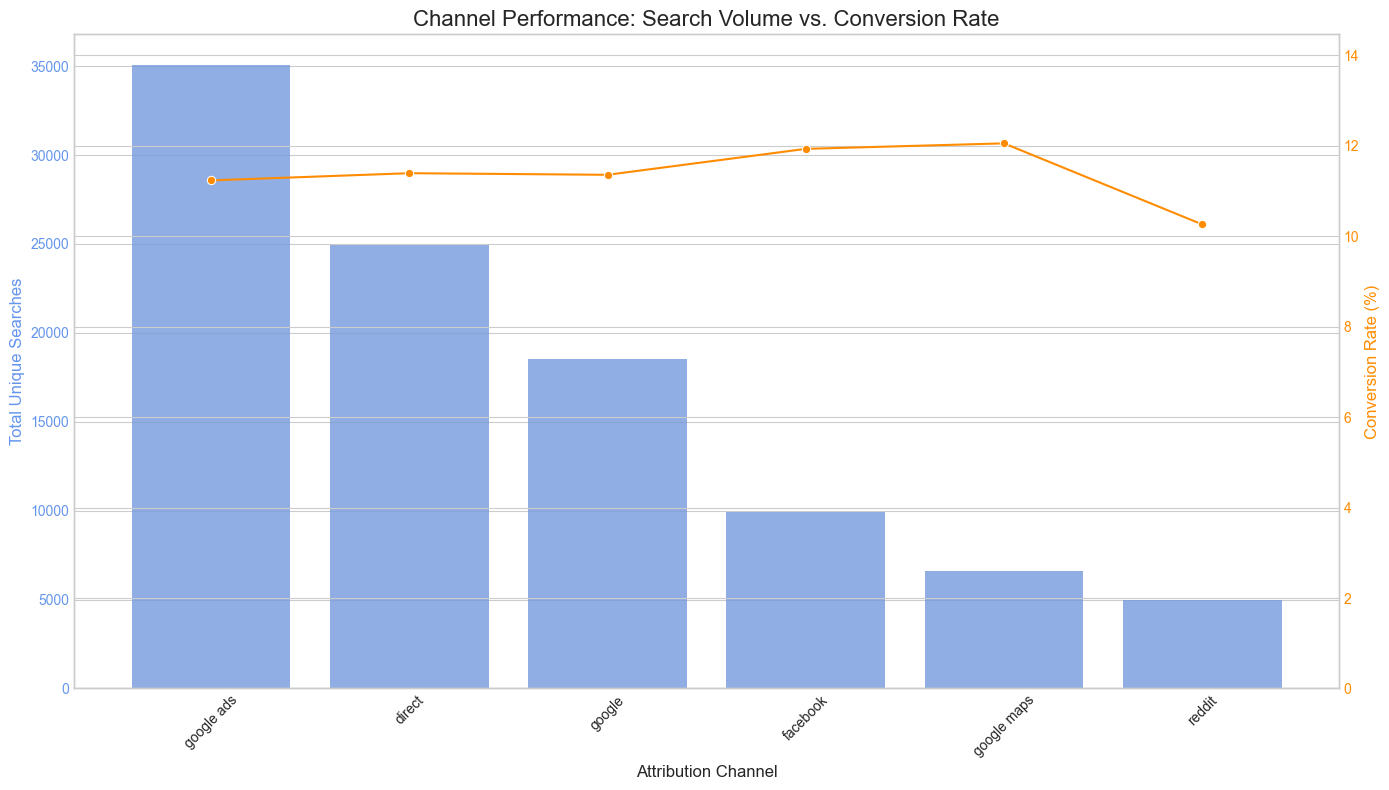

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'data/channel_conversion_rate.csv'

try:
    df = pd.read_csv(csv_file)
    
    df = df.sort_values('total_unique_searches', ascending=False)

    fig, ax1 = plt.subplots(figsize=(14, 8))
    
    sns.barplot(x='first_attribution_channel', y='total_unique_searches', data=df, ax=ax1, color='cornflowerblue', alpha=0.8)
    ax1.set_xlabel('Attribution Channel', fontsize=12)
    ax1.set_ylabel('Total Unique Searches', fontsize=12, color='cornflowerblue')
    ax1.tick_params(axis='y', labelcolor='cornflowerblue')
    ax1.tick_params(axis='x', rotation=45) 

    ax2 = ax1.twinx()
    sns.lineplot(x='first_attribution_channel', y='conversion_rate', data=df, ax=ax2, color='darkorange', marker='o', sort=False)
    ax2.set_ylabel('Conversion Rate (%)', fontsize=12, color='darkorange')
    ax2.tick_params(axis='y', labelcolor='darkorange')
    
    ax2.set_ylim(0, df['conversion_rate'].max() * 1.2)

    plt.title('Channel Performance: Search Volume vs. Conversion Rate', fontsize=16)
    fig.tight_layout() 

    plt.savefig('charts/channel_performance_dual_axis.png')

except FileNotFoundError:
    print("Did you forget the name of " + csv_file + "?")

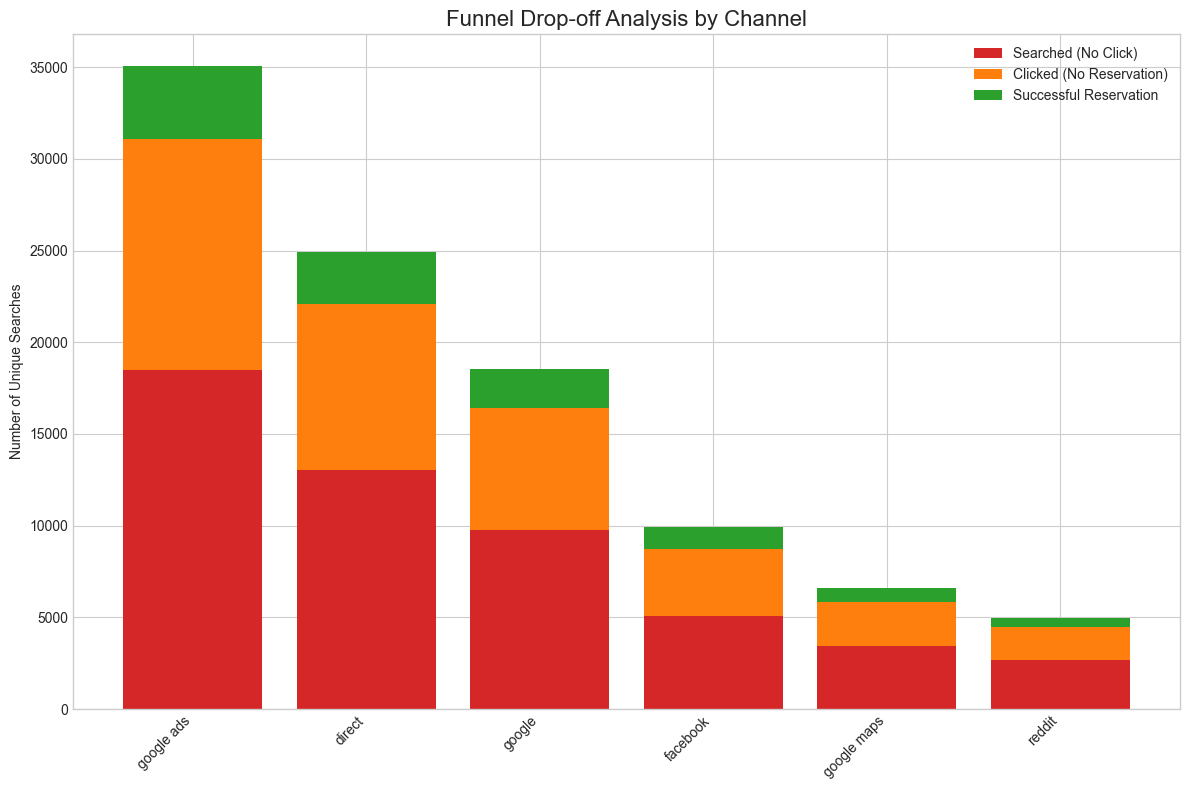

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'data/funnel_stages.csv'

try:
    df = pd.read_csv(csv_file)

    df = df.sort_values('total_searches', ascending=False)

    searched_no_click = df['total_searches'] - df['searches_with_click']
    clicked_no_reservation = df['searches_with_click'] - df['successful_reservations']
    successful_reservations = df['successful_reservations']
    channels = df['first_attribution_channel']

    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, 8))

    ax.bar(channels, searched_no_click, label='Searched (No Click)', color='#d62728')
    ax.bar(channels, clicked_no_reservation, bottom=searched_no_click, label='Clicked (No Reservation)', color='#ff7f0e')
    ax.bar(channels, successful_reservations, bottom=searched_no_click + clicked_no_reservation, label='Successful Reservation', color='#2ca02c')

    ax.set_ylabel('Number of Unique Searches')
    ax.set_title('Funnel Drop-off Analysis by Channel', fontsize=16)
    ax.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    plt.savefig('charts/funnel_dropoff_by_channel.png')

except FileNotFoundError:
    print("Did you forget the name of " + csv_file + "?")

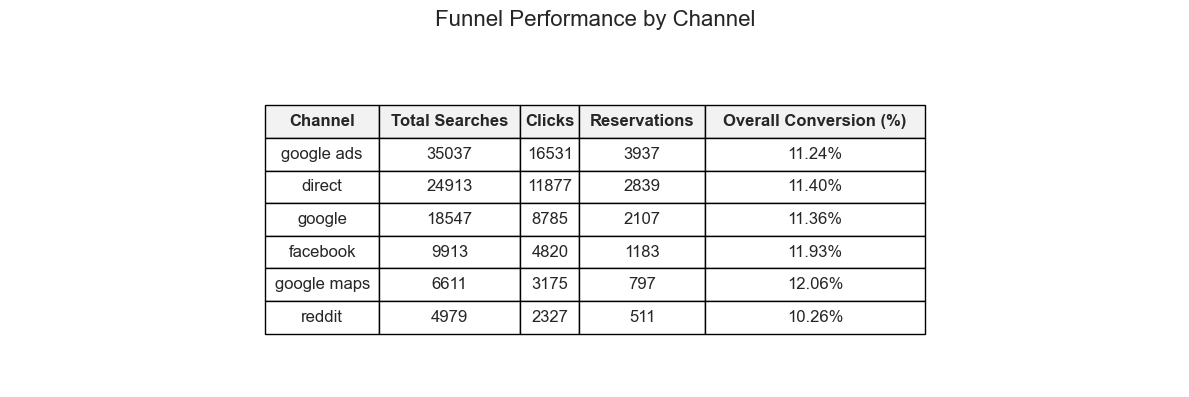

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file = 'data/funnel_stages.csv'

try:
    df = pd.read_csv(csv_file)

    df = df.sort_values('total_searches', ascending=False)
    
    table_df = df[['first_attribution_channel', 'total_searches', 'searches_with_click', 'successful_reservations', 'overall_conversion_rate']]
    table_df = table_df.rename(columns={
        'first_attribution_channel': 'Channel',
        'total_searches': 'Total Searches',
        'searches_with_click': 'Clicks',
        'successful_reservations': 'Reservations',
        'overall_conversion_rate': 'Overall Conversion (%)'
    })

    table_df['Overall Conversion (%)'] = table_df['Overall Conversion (%)'].map('{:.2f}%'.format)

    fig, ax = plt.subplots(figsize=(12, 4)) 

    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False) 

    tab = ax.table(
        cellText=table_df.values,
        colLabels=table_df.columns,
        loc='center',
        cellLoc='center',
        colColours=["#f2f2f2"] * table_df.shape[1] # Set header color
    )

    tab.auto_set_font_size(False)
    tab.set_fontsize(12)
    tab.auto_set_column_width(col=list(range(len(table_df.columns))))
    tab.scale(1.2, 1.8)

    for (i, j), cell in tab.get_celld().items():
        if i == 0:
            cell.set_text_props(weight='bold')

    plt.suptitle('Funnel Performance by Channel', fontsize=16)
    plt.tight_layout()
    

    plt.savefig('charts/funnel_stages_table.png')
    

except FileNotFoundError:
    print("Did you forget the name of " + csv_file + "?")

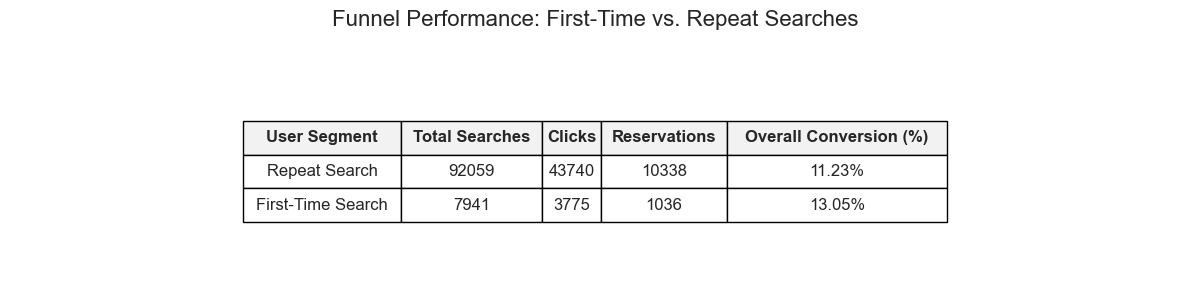

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

csv_file = 'data/first_search.csv'
try:
    df = pd.read_csv(csv_file)

    df['is_first_search'] = df['is_first_search'].map({1: 'First-Time Search', 0: 'Repeat Search'})
    
    table_df = df[['is_first_search', 'total_searches', 'searches_with_click', 'successful_reservations', 'overall_conversion_rate']]
    table_df = table_df.rename(columns={
        'is_first_search': 'User Segment',
        'total_searches': 'Total Searches',
        'searches_with_click': 'Clicks',
        'successful_reservations': 'Reservations',
        'overall_conversion_rate': 'Overall Conversion (%)'
    })

    table_df['Overall Conversion (%)'] = table_df['Overall Conversion (%)'].map('{:.2f}%'.format)

    fig, ax = plt.subplots(figsize=(12, 3)) 

    ax.xaxis.set_visible(False) 
    ax.yaxis.set_visible(False)
    ax.set_frame_on(False)

    tab = ax.table(
        cellText=table_df.values,
        colLabels=table_df.columns,
        loc='center',
        cellLoc='center',
        colColours=["#f2f2f2"] * table_df.shape[1]
    )

    tab.auto_set_font_size(False)
    tab.set_fontsize(12)
    tab.auto_set_column_width(col=list(range(len(table_df.columns))))
    tab.scale(1.2, 2.0)

    for (i, j), cell in tab.get_celld().items():
        if i == 0:
            cell.set_text_props(weight='bold')

    plt.suptitle('Funnel Performance: First-Time vs. Repeat Searches', fontsize=16)
    plt.tight_layout()
    
    plt.savefig('charts/first_search_performance_table.png')

except FileNotFoundError:
    print("Did you forget the name of " + csv_file + "?")